<a href="https://colab.research.google.com/github/Sathwik828/ADM-project/blob/main/ADM_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Trend Analysis using Data Mining

Dataset Shape: (44446, 12)

Missing Values:
 id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
Unnamed: 10           0
Unnamed: 11           0
dtype: int64

Numerical Summary:
                  id          year
count  44446.000000  44446.000000
mean   29692.631350   2012.805940
std    17048.234982      2.126377
min     1163.000000   2007.000000
25%    14770.250000   2011.000000
50%    28609.500000   2012.000000
75%    44678.750000   2015.000000
max    60000.000000   2019.000000

Unique Categorical Columns:
gender: 5 unique values
masterCategory: 7 unique values
subCategory: 45 unique values
articleType: 143 unique values
baseColour: 46 unique values
season: 4 unique values
usage: 8 unique values
productDisplayName: 31135 unique values
Unnamed: 10: 9 unique values
Unnamed: 11: 2 unique values


<ipython-input-10-dd2843b2293f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')


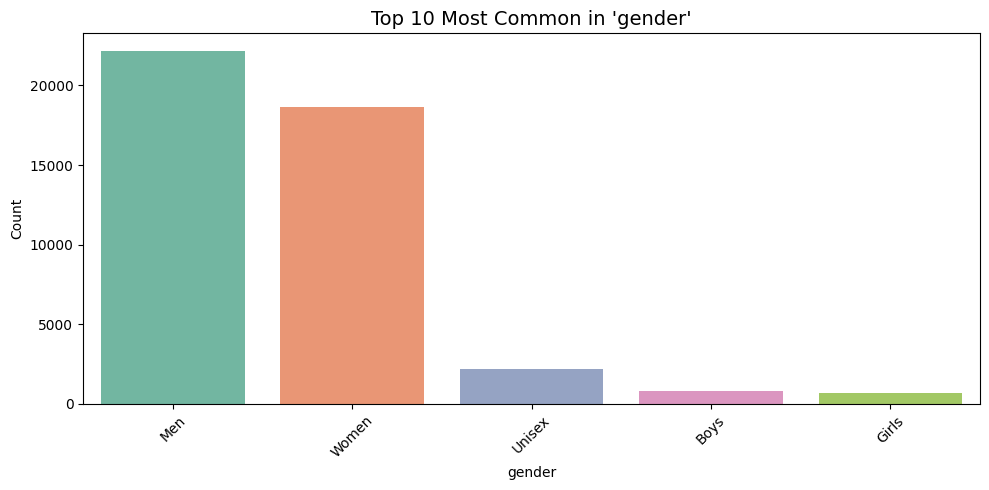

<ipython-input-10-dd2843b2293f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')


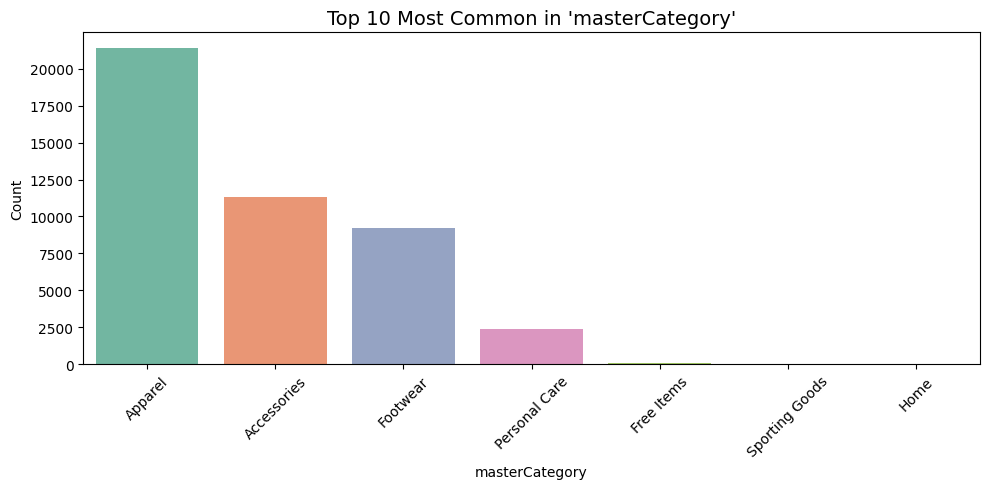

<ipython-input-10-dd2843b2293f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')


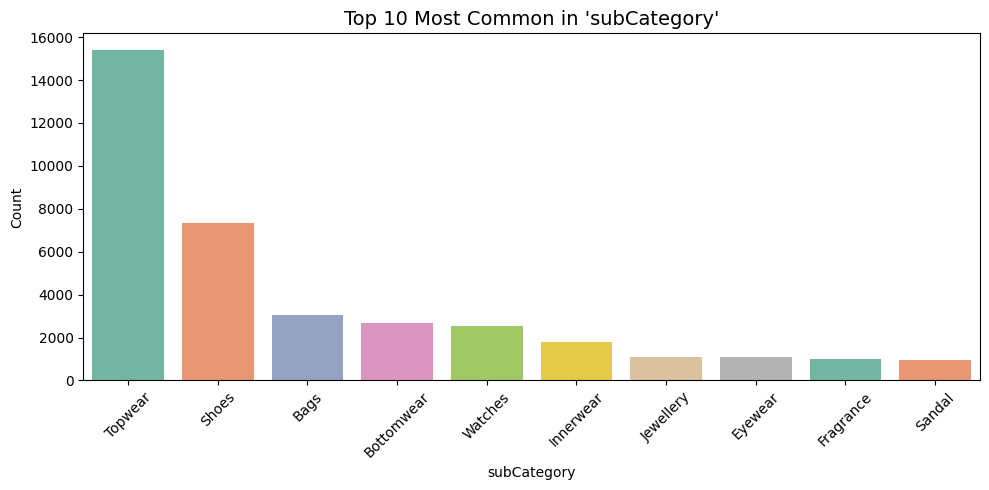

<ipython-input-10-dd2843b2293f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')


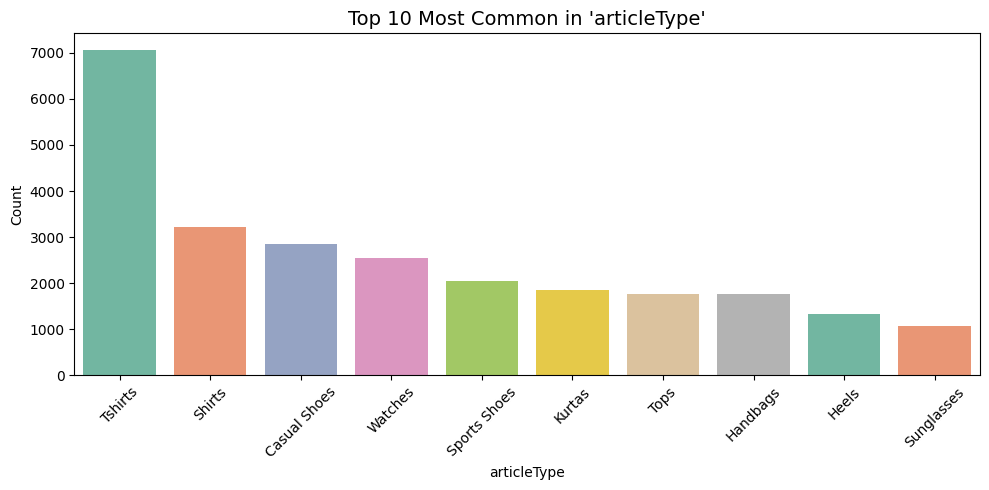

<ipython-input-10-dd2843b2293f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')


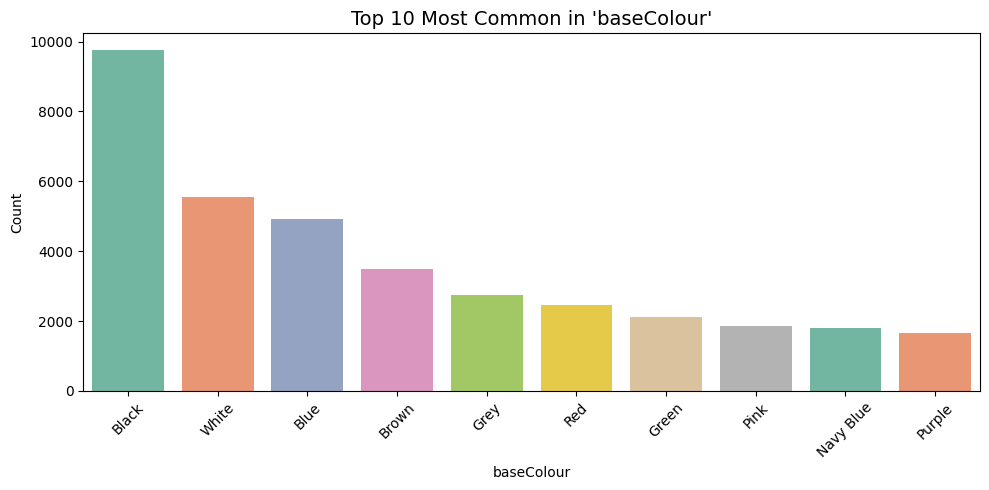

<ipython-input-10-dd2843b2293f>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')


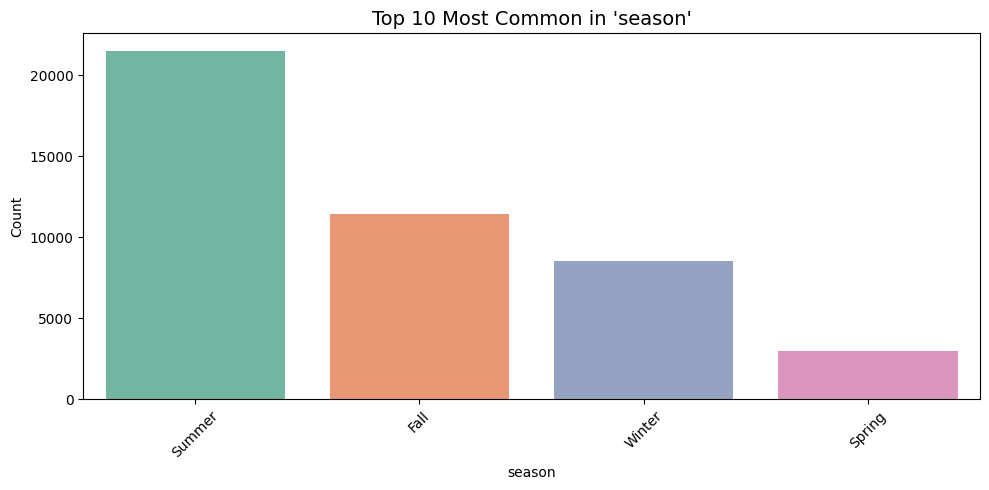

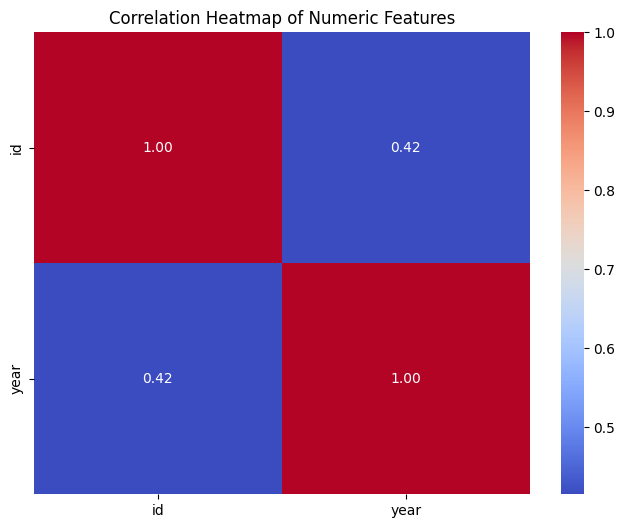

<ipython-input-10-dd2843b2293f>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topwear_article_counts.index, y=topwear_article_counts.values, palette='viridis')


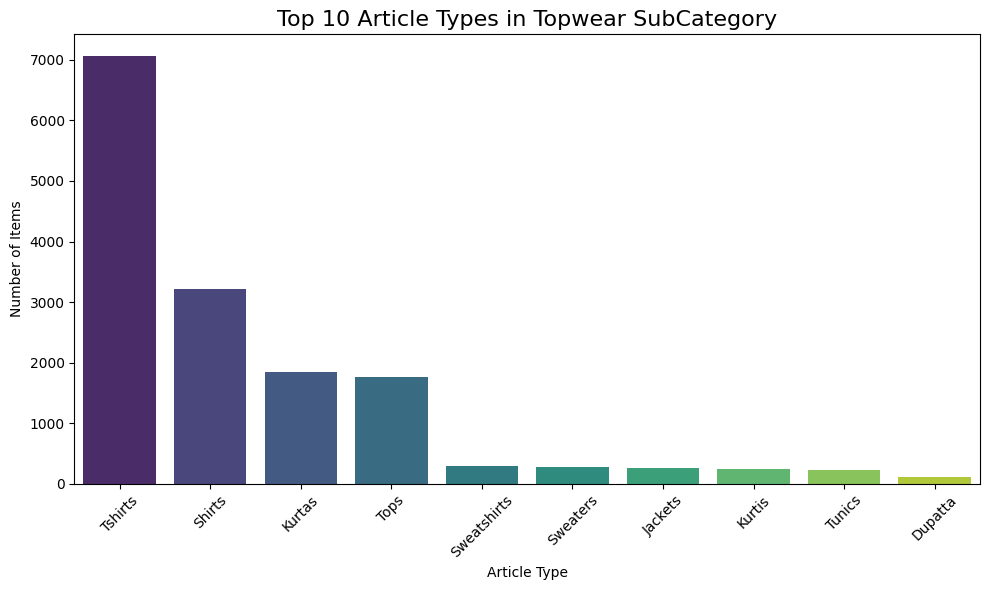

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("styles.csv")

# Fill missing values with mean for numerical, and mode for categorical
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# 1. Dataset Info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# 2. Descriptive statistics
print("\nNumerical Summary:\n", df.describe())

# 3. Categorical Summary
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nUnique Categorical Columns:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# 4. Bar Plots for Top Categories
top_cats = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season']
for col in top_cats:
    plt.figure(figsize=(10,5))
    top_vals = df[col].value_counts().nlargest(10)
    sns.barplot(x=top_vals.index, y=top_vals.values, palette='Set2')
    plt.title(f"Top 10 Most Common in '{col}'", fontsize=14)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Correlation Heatmap (if numerical columns present)
num_cols = df.select_dtypes(include=['int64', 'float64'])
if not num_cols.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()
else:
    print("\nNo numerical columns available for correlation heatmap.")

# 6. Topwear Article Types Distribution
topwear_df = df[df['subCategory'] == 'Topwear']
topwear_article_counts = topwear_df['articleType'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=topwear_article_counts.index, y=topwear_article_counts.values, palette='viridis')
plt.title("Top 10 Article Types in Topwear SubCategory", fontsize=16)
plt.ylabel("Number of Items")
plt.xlabel("Article Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("styles.csv")

# Fill missing values: mean for numeric, mode for categorical
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Show basic info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (44446, 12)

Missing Values:
 id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
Unnamed: 10           0
Unnamed: 11           0
dtype: int64


<ipython-input-12-9ece550de6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")


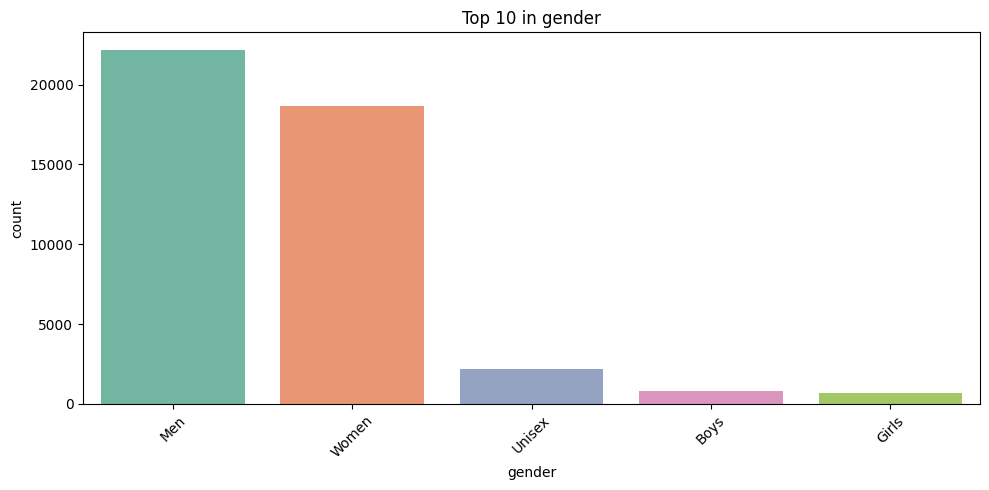

<ipython-input-12-9ece550de6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")


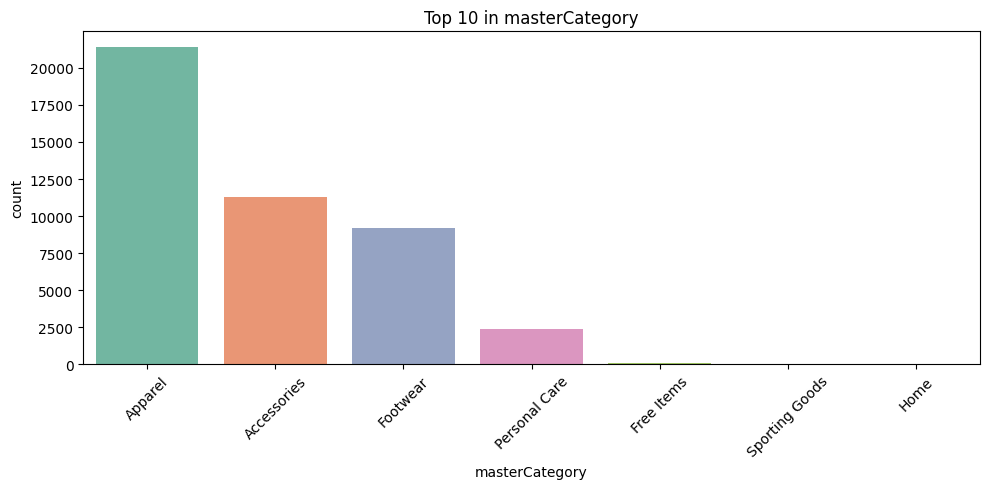

<ipython-input-12-9ece550de6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")


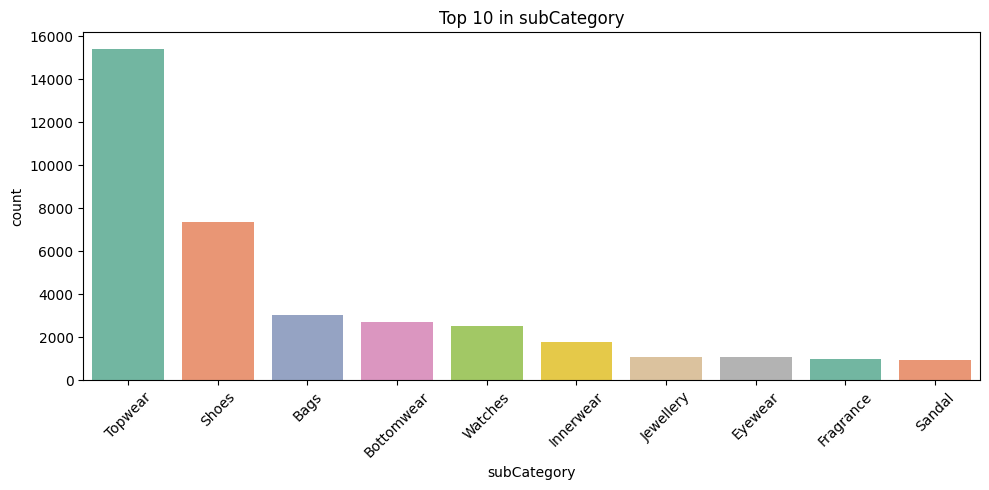

<ipython-input-12-9ece550de6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")


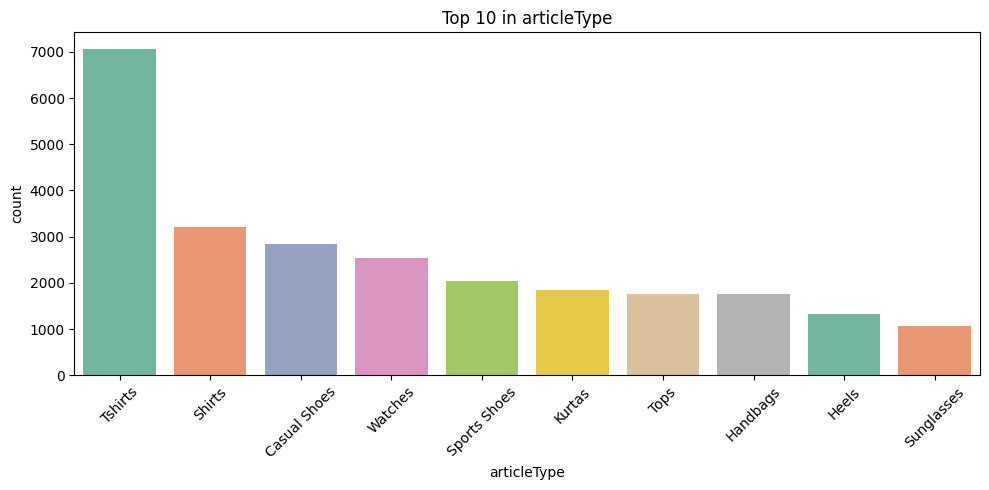

<ipython-input-12-9ece550de6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")


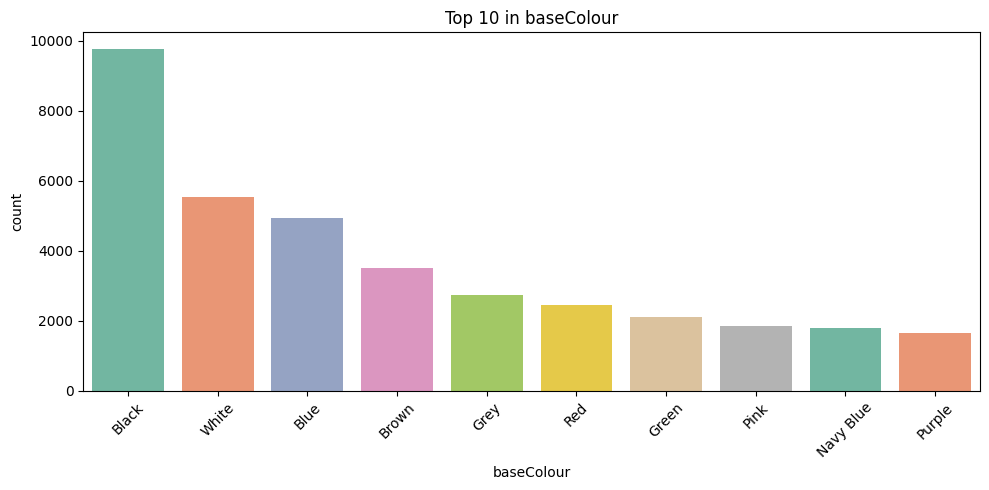

<ipython-input-12-9ece550de6a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")


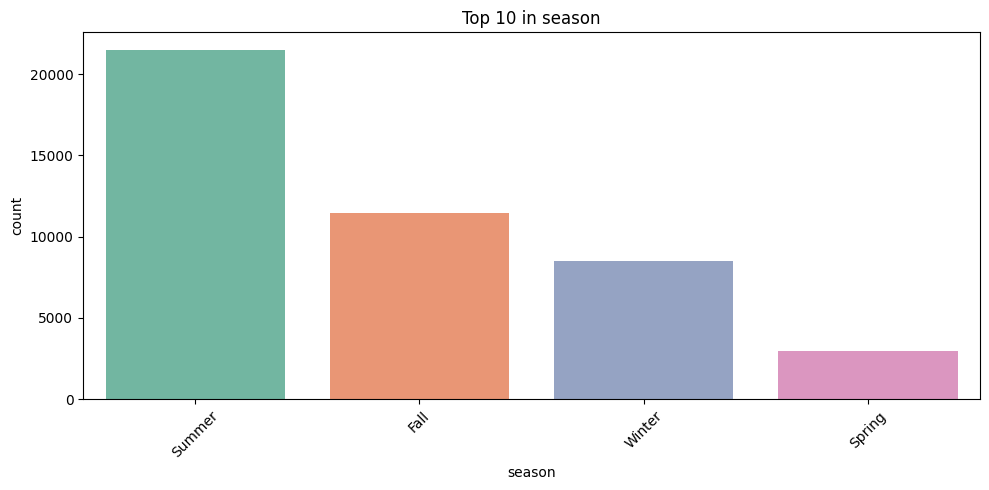

In [ ]:
top_cats = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season']

for col in top_cats:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index[:10], palette="Set2")
    plt.title(f"Top 10 in {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-13-21d1ec58c9d7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topwear_article_counts.index, y=topwear_article_counts.values, palette='viridis')


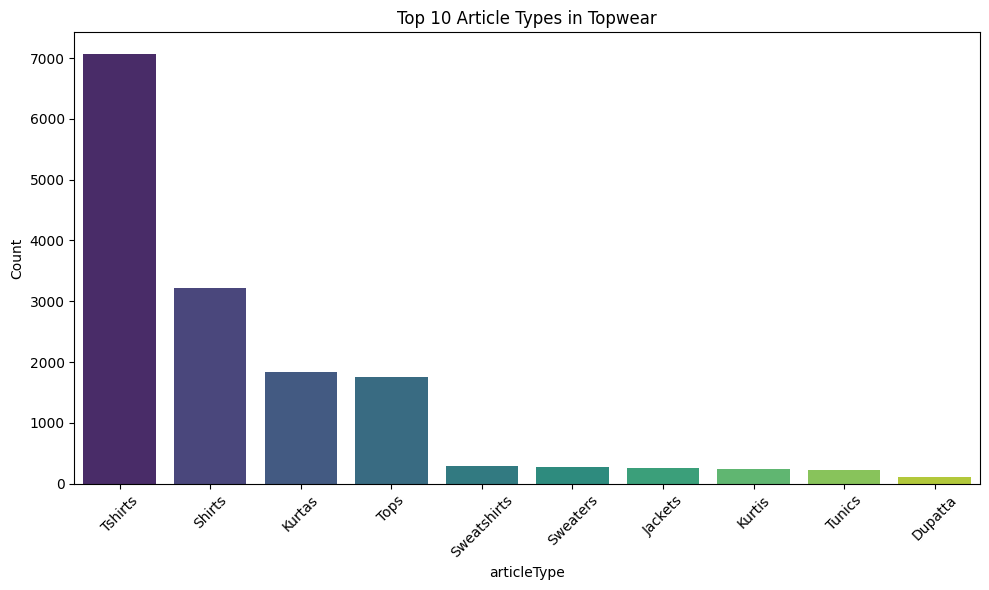

In [ ]:
topwear_df = df[df['subCategory'] == 'Topwear']
topwear_article_counts = topwear_df['articleType'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=topwear_article_counts.index, y=topwear_article_counts.values, palette='viridis')
plt.title("Top 10 Article Types in Topwear")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-14-6951c57c8f77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette="coolwarm")


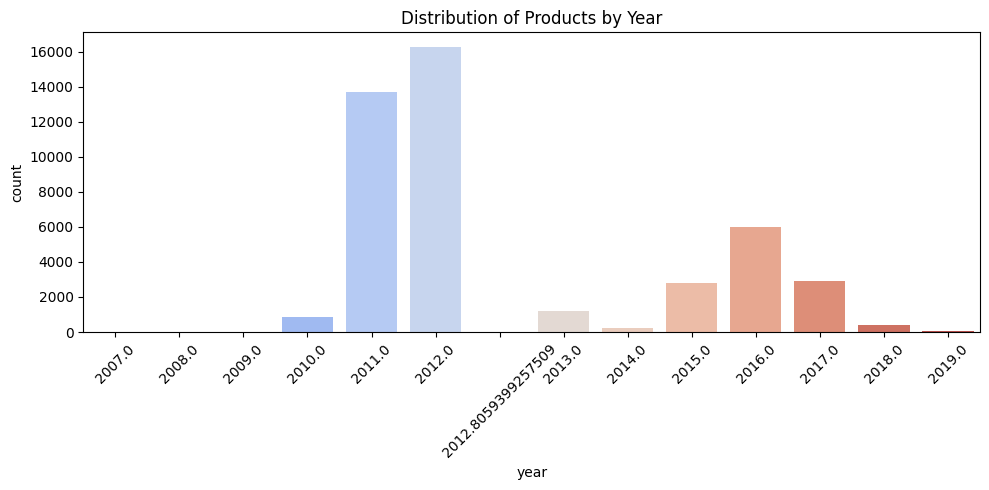

In [ ]:
if 'year' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='year', palette="coolwarm")
    plt.title("Distribution of Products by Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'year' not found in the dataset.")


<ipython-input-15-153b16dd8d17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette="Pastel1")


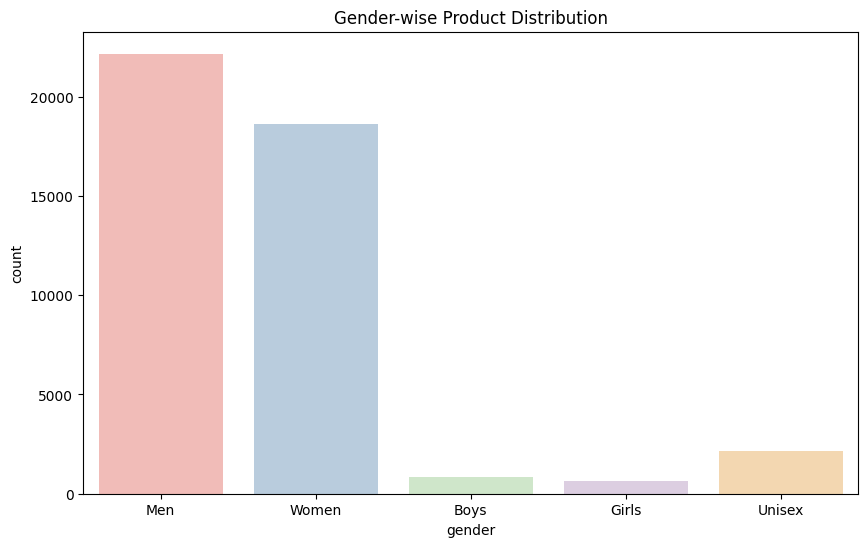

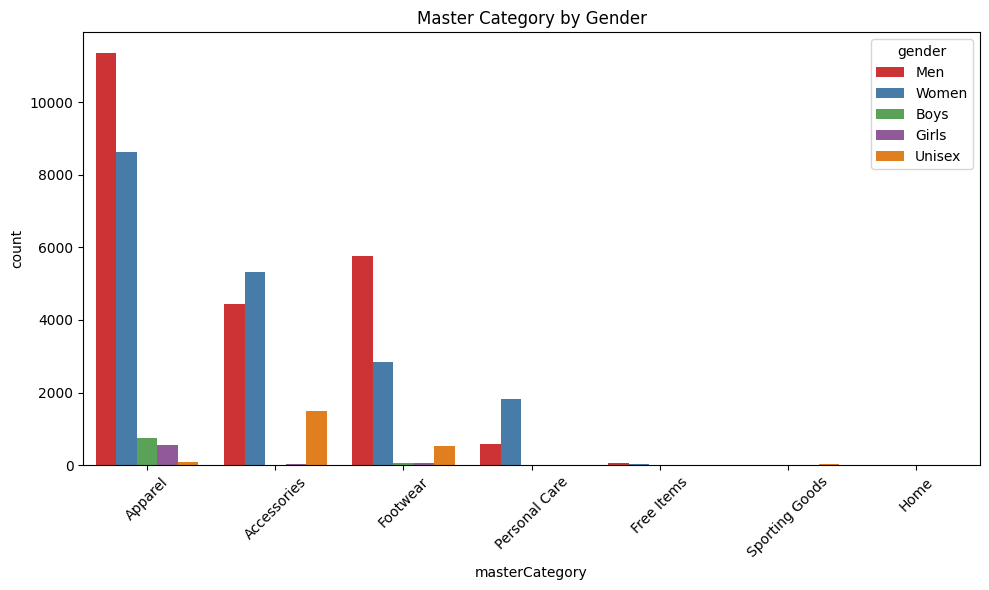

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', palette="Pastel1")
plt.title("Gender-wise Product Distribution")
plt.show()

# Optional: Gender vs Master Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='masterCategory', hue='gender', palette="Set1")
plt.title("Master Category by Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-16-b8c511835a5c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='usage', data=df, order=df['usage'].value_counts().index, palette="Set3")


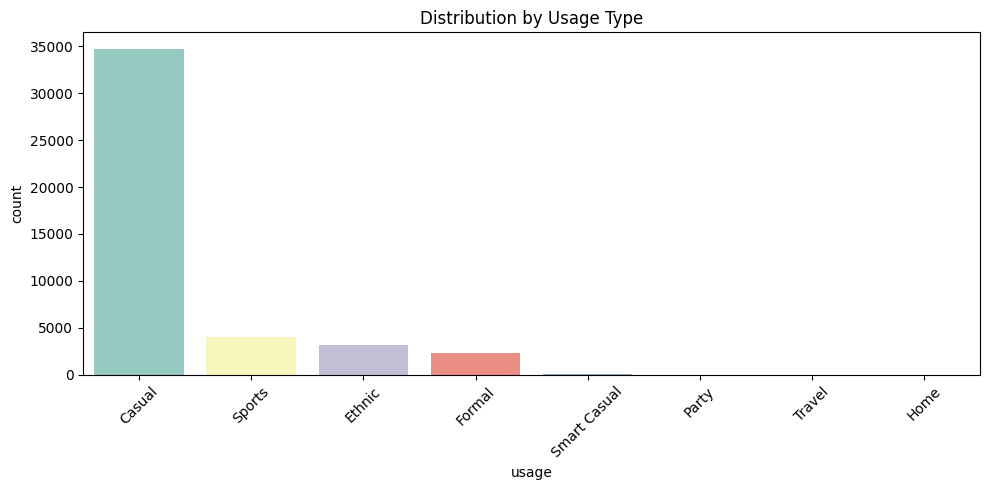

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='usage', data=df, order=df['usage'].value_counts().index, palette="Set3")
plt.title("Distribution by Usage Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("\n--- PROJECT SUMMARY ---")
print("1. Cleaned the dataset and filled missing values appropriately.")
print("2. Top categories analyzed: gender, color, season, etc.")
print("3. Focused on 'Topwear' subcategory and identified most common article types.")
print("4. Visualized product distribution by gender and usage.")
print("5. This analysis helps understand current fashion trends and customer demand.")



--- PROJECT SUMMARY ---
1. Cleaned the dataset and filled missing values appropriately.
2. Top categories analyzed: gender, color, season, etc.
3. Focused on 'Topwear' subcategory and identified most common article types.
4. Visualized product distribution by gender and usage.
5. This analysis helps understand current fashion trends and customer demand.
